# Evaluation

Functions to test viability of items such as factors.

- Sharpe Values
- Monotonicity  from platform import python_version

In [3]:
from platform import python_version
import time
from datetime import datetime
import os
import pandas as pd
import numpy as np
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 8)

# Set the import path for the tools directiory
import sys
# insert at position 1 in the path, as 0 is the path of this file.
sys.path.insert(1, 'tools')
import importlib
import ameritrade_functions as amc
importlib.reload(amc)
import utils
importlib.reload(utils)

print(f'Python version: {python_version()}')
print(f'Pandas version: {pd.__version__}')

Python version: 3.8.10
Pandas version: 0.25.3


In [4]:
username = os.getenv('maiotradeuser')
password = os.getenv('maiotradepw')
client_id = os.getenv('maiotradeclientid')

# For Chromedriver
from pathlib import Path
chrome_executabel_path = str(Path.home()) + r'\Anaconda Projects\chromedriver\chromedriver'

# Make sure we have a data directory
Path('./data').mkdir(parents=True, exist_ok=True) 

# Which account are we interested in
masked_account_number = '#---9216'
account_portfolios_file_name = 'data/portfolio_data.csv'
portfolio_file_name = 'data/portfolio_' + masked_account_number[-4:] + '.csv'
price_histories_file_name = 'data/price_histories.csv'

## Stock Universe Price Histories

Here we setup the universe from the S&P 500.

In [5]:
number_of_years = 5

snp_500_df = utils.get_snp500()
stock_universe = set(snp_500_df.index.to_list())
print(f'Number of stocks: {len(stock_universe)}')
price_histories = amc.AmeritradeRest(username, password, client_id).get_price_histories(stock_universe, datetime.today().strftime('%Y-%m-%d'), num_periods=number_of_years)
utils.save_price_histories(price_histories, price_histories_file_name)

In [31]:
price_histories = utils.read_price_histories(price_histories_file_name)
print(f'Date range for price histories: {price_histories.date.min().date()} to {price_histories.date.max().date()}')
pricing = utils.get_close_values(price_histories)
print(f'You have {len(pricing.columns)} stocks')
print(pricing.columns.to_list())
pricing.tail()

Date range for price histories: 2016-09-06 to 2021-09-03
You have 505 stocks
['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2021-08-30 00:00:00+00:00,176.73,19.51,201.14,153.12,120.57,119.52,360.96,125.94,337.00,665.99,...,69.03,155.07,55.16,61.28,136.48,130.69,149.78,584.78,57.20,205.89
2021-08-31 00:00:00+00:00,175.47,19.94,202.85,151.83,120.78,122.21,363.96,126.37,336.56,663.70,...,68.75,155.59,54.52,61.70,136.31,131.03,150.45,587.17,57.90,204.56
2021-09-01 00:00:00+00:00,175.45,19.64,201.88,152.51,112.27,122.68,363.27,127.40,337.90,665.89,...,69.75,154.47,53.77,61.43,136.55,131.55,150.87,582.78,57.17,206.44
2021-09-02 00:00:00+00:00,178.02,19.76,200.81,153.65,112.02,124.98,369.83,128.49,341.00,664.64,...,70.32,154.14,55.08,62.33,138.03,131.27,149.09,588.25,57.15,209.22
2021-09-03 00:00:00+00:00,179.28,19.37,199.44,154.30,111.62,125.14,372.69,128.94,343.33,666.59,...,69.80,155.96,54.87,62.43,137.25,130.92,146.74,590.60,57.12,209.69


In [18]:
from dateutil.relativedelta import relativedelta
import pandas_datareader.data as web
web.DataReader('GOOG', 'google', datetime.today()-relativedelta(years=5), datetime.today())

NotImplementedError: data_source='google' is not implemented

In [11]:
test_tickers = ['GOOG', 'AAPL']
print(test_tickers)
pan = web.DataReader(test_tickers, "yahoo")

['GOOG', 'AAPL']


C:\Users\HP-Z440\anaconda3\envs\ai_for_trading\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'GOOG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\HP-Z440\anaconda3\envs\ai_for_trading\lib\site-packages\pandas_datareader\base.py:270: SymbolWarning: Failed to read symbol: 'AAPL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: No data fetched using 'YahooDailyReader'

## Create an alpha factor to evaluate

In [29]:
import trading_factors as alpha_factors
importlib.reload(alpha_factors)

alpha =  pd.DataFrame(alpha_factors.OvernightSentiment(price_histories, 5).demean().rank().zscore().smoothed(10).rank().zscore().for_al())

In [30]:
alpha

overnight_sentiment_5_day_smoothed
date                      ticker                                    
2016-09-19 00:00:00+00:00 A                                 0.658524
                          AAL                              -1.008364
                          AAP                              -0.267525
                          AAPL                              1.227872
                          ABBV                             -1.289609
...                                                              ...
2021-09-03 00:00:00+00:00 YUM                              -1.221012
                          ZBH                              -0.027438
                          ZBRA                              1.296468
                          ZION                             -0.260666
                          ZTS                              -0.843733

[631250 rows x 1 columns]

Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


C:\Users\HP-Z440\anaconda3\envs\ai_for_trading\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\HP-Z440\anaconda3\envs\ai_for_trading\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\HP-Z440\anaconda3\envs\ai_for_trading\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

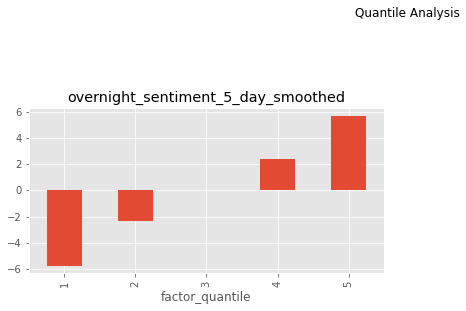

In [32]:
clean_factor_data, unixt_factor_data = alpha_factors.prepare_alpha_lense_factor_data(alpha, pricing)
alpha_factors.plot_basis_points_per_day_quantile(unixt_factor_data)

In [35]:
factor_returns = alpha_factors.get_factor_returns(clean_factor_data)

In [36]:
factors_sharpe_ratio = alpha_factors.sharpe_ratio(factor_returns)

In [38]:
print(factors_sharpe_ratio.round(2))

                                    Sharpe Ratio
overnight_sentiment_5_day_smoothed          1.96


C:\Users\HP-Z440\anaconda3\envs\ai_for_trading\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


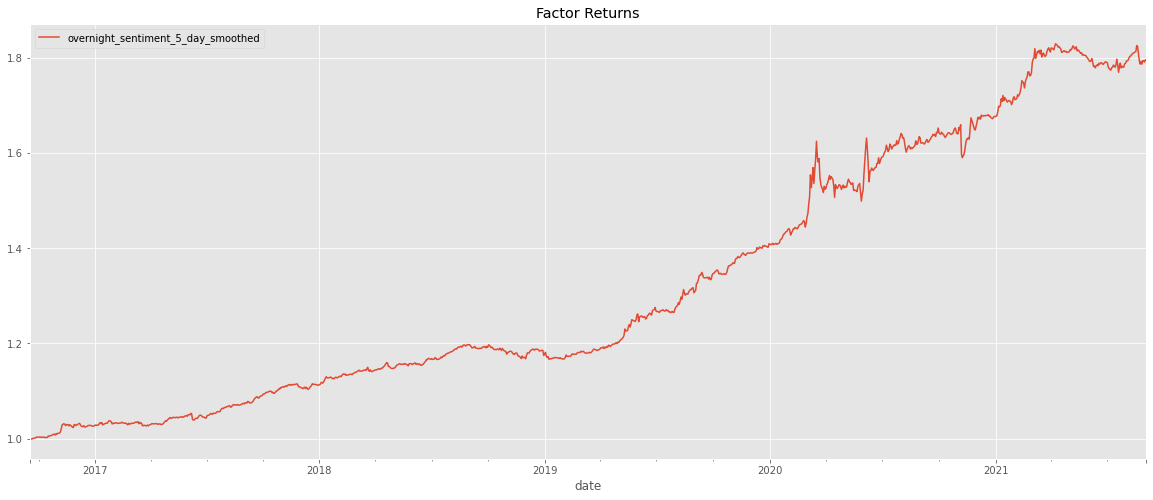

In [39]:
alpha_factors.plot_factor_returns(factor_returns)